In [23]:
# 导入需要的包 
from sklearn import svm 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")  #忽略告警

In [24]:
# 读取数据： Universal Bank Data
df = pd.read_csv('dataset.csv')
df.head()


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [25]:
df.isnull().sum()


URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [26]:
df_new=df.drop(['URL','CHARSET','SERVER','WHOIS_COUNTRY','WHOIS_STATEPRO','WHOIS_REGDATE','CONTENT_LENGTH','WHOIS_UPDATED_DATE'],axis=1)
df_new.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [27]:
df_new=df_new.dropna(axis=0, how='any')
print(df_new)

      URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  TCP_CONVERSATION_EXCHANGE  \
0             16                          7                          7   
1             16                          6                         17   
2             16                          6                          0   
3             17                          6                         31   
4             17                          6                         57   
...          ...                        ...                        ...   
1776         194                         16                          0   
1777         198                         17                          0   
1778         201                         34                         83   
1779         234                         34                          0   
1780         249                         40                         19   

      DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  \
0                        0           2

In [29]:
print(df_new.describe())

        URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  TCP_CONVERSATION_EXCHANGE  \
count  1780.000000                1780.000000                1780.000000   
mean     56.936517                  11.109551                  16.267978   
std      27.543535                   4.550240                  40.511313   
min      16.000000                   5.000000                   0.000000   
25%      39.000000                   8.000000                   0.000000   
50%      49.000000                  10.000000                   7.000000   
75%      68.000000                  13.000000                  22.000000   
max     249.000000                  43.000000                1194.000000   

       DIST_REMOTE_TCP_PORT   REMOTE_IPS     APP_BYTES  SOURCE_APP_PACKETS  \
count           1780.000000  1780.000000  1.780000e+03         1780.000000   
mean               5.474719     3.061236  2.983860e+03           18.548315   
std               21.813300     3.387834  5.606629e+04           41.637443   
min

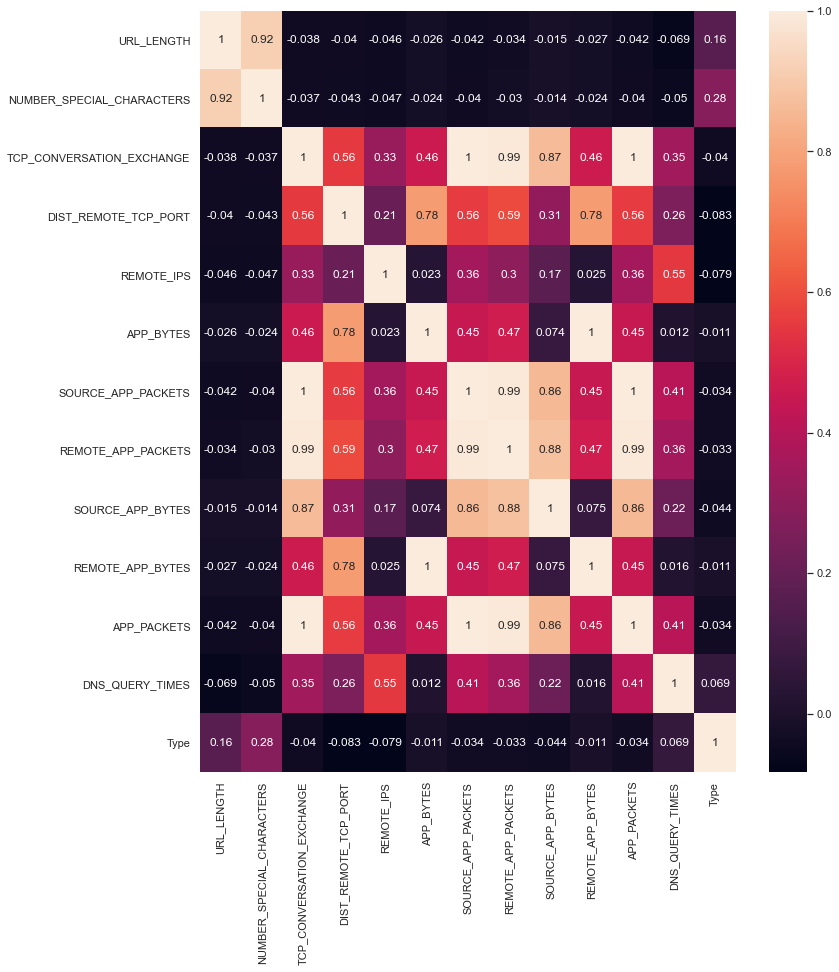

In [30]:
import seaborn as sns
plt.figure(figsize=(12,14))
uniform_data = df_new.corr()
sns.set()
heatmap = sns.heatmap(uniform_data,annot=True)

plt.show()

In [31]:
# Scaling the data using Standard Scaler
#使用StandardScaler对”特征数据“进行标准化，并按dataframe形式展示
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df_std=std.fit_transform(df_new)
pd.DataFrame(df_std,columns=df_new.columns)


,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,-1.486665,-0.903404,-0.228839,-0.251051,-0.313337,-0.040746,-0.229385,-0.188675,-0.211108,-0.041482,-0.229385,-0.089925,2.690862
1,-1.486665,-1.123234,0.018075,0.069944,0.277176,-0.031291,-0.037196,0.005304,-0.209505,-0.034382,-0.037196,-0.772512,-0.371628
2,-1.486665,-1.123234,-0.401679,-0.251051,-0.903851,-0.053235,-0.445597,-0.404207,-0.227613,-0.056325,-0.445597,-0.772512,-0.371628
3,-1.450349,-1.123234,0.363754,0.757791,-0.018080,0.014775,0.491323,0.393261,0.041264,0.021814,0.491323,1.957836,-0.371628
4,-1.450349,-1.123234,1.005731,-0.159338,0.572433,0.023089,1.019842,0.932091,1.631637,0.025490,1.019842,0.592662,-0.371628
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,4.977647,1.075069,-0.401679,-0.251051,-0.903851,-0.053235,-0.445597,-0.339548,-0.224950,-0.056325,-0.445597,-0.772512,2.690862
1776,5.122913,1.294900,-0.401679,-0.251051,-0.903851,-0.053235,-0.445597,-0.361101,-0.225838,-0.056325,-0.445597,-0.772512,2.690862
1777,5.231862,5.032016,1.647707,-0.159338,0.867690,0.065069,1.644455,1.514027,1.664445,0.067574,1.644455,0.592662,-0.371628
1778,6.430302,5.032016,-0.401679,-0.251051,-0.903851,-0.053235,-0.445597,-0.404207,-0.227613,-0.056325,-0.445597,-0.772512,-0.371628


In [32]:
x=df_new.drop(['Type'],axis=1)
y=df_new['Type']


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=47)
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))





x_train shape: (1424, 12)
y_train shape: (1424,)
x_test shape: (356, 12)
y_test shape: (356,)


In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
linear_classifier=svm.SVC(kernel='linear')

linear_classifier.fit(x_train,y_train)

# 预测
y_predict = linear_classifier.predict(x_test)

print('The accuracy  is:',accuracy_score(y_test,y_predict))



The accuracy  is: 0.901685393258427


The confusion matrix result:
 [[299  18]
 [ 17  22]]


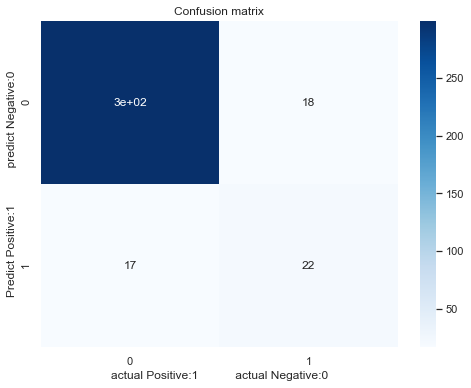

In [35]:
confusion_matrix_result = confusion_matrix(y_test,y_predict)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('actual Positive:1           actual Negative:0')
plt.ylabel('Predict Positive:1           predict Negative:0')
plt.title("Confusion matrix")
plt.show()


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.95      0.94      0.94       317
           1       0.55      0.56      0.56        39

    accuracy                           0.90       356
   macro avg       0.75      0.75      0.75       356
weighted avg       0.90      0.90      0.90       356

